In [4]:
#Generate code for an animated 3d plot of a launch from earth landing on mars and then back to earth at the next launch window
#豆包
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D

# 定义常量
AU = 1.496e8  # 天文单位 (km)
G = 6.67430e-11  # 万有引力常数 (m^3 kg^-1 s^-2)
M_sun = 1.989e30  # 太阳质量 (kg)

# 行星参数
R_earth = 6371  # 地球半径 (km)
R_mars = 3389.5  # 火星半径 (km)
a_earth = 1 * AU  # 地球轨道半长轴 (km)
a_mars = 1.524 * AU  # 火星轨道半长轴 (km)
T_earth = 365.25 * 24 * 3600  # 地球公转周期 (s)
T_mars = 687 * 24 * 3600  # 火星公转周期 (s)

# 计算行星位置
def planet_position(a, T, t):
    theta = 2 * np.pi * t / T
    x = a * np.cos(theta)
    y = a * np.sin(theta)
    z = 0
    return x, y, z

# 计算霍曼转移轨道
def hohmann_transfer(a1, a2, t):
    a = (a1 + a2) / 2
    T = 2 * np.pi * np.sqrt(a ** 3 / (G * M_sun))
    theta = np.pi * t / (T / 2)
    r = a * (1 - (a2 - a1) / (a2 + a1) * np.cos(theta))
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    z = 0
    return x, y, z

# 模拟参数
total_time = 1000 * 24 * 3600  # 总模拟时间 (s)
dt = 24 * 3600  # 时间步长 (s)
time_points = np.arange(0, total_time, dt)

# 创建 3D 图形
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(-2 * AU, 2 * AU)
ax.set_ylim(-2 * AU, 2 * AU)
ax.set_zlim(-2 * AU, 2 * AU)
ax.set_xlabel('X (km)')
ax.set_ylabel('Y (km)')
ax.set_zlabel('Z (km)')
ax.set_title('Earth - Mars - Earth Mission')

# 绘制太阳
u, v = np.mgrid[0:2 * np.pi:20j, 0:np.pi:10j]
x = 0.1 * AU * np.cos(u) * np.sin(v)
y = 0.1 * AU * np.sin(u) * np.sin(v)
z = 0.1 * AU * np.cos(v)
ax.plot_surface(x, y, z, color='yellow')

# 初始化行星和航天器点
earth_point, = ax.plot([], [], [], 'bo', markersize=10)
mars_point, = ax.plot([], [], [], 'ro', markersize=10)
spacecraft_point, = ax.plot([], [], [], 'go', markersize=5)
trajectory_line, = ax.plot([], [], [], 'g--', lw=1)

# 轨迹历史
x_traj, y_traj, z_traj = [], [], []

# 动画初始化函数
def init():
    earth_point.set_data([], [])
    earth_point.set_3d_properties([])
    mars_point.set_data([], [])
    mars_point.set_3d_properties([])
    spacecraft_point.set_data([], [])
    spacecraft_point.set_3d_properties([])
    trajectory_line.set_data([], [])
    trajectory_line.set_3d_properties([])
    return earth_point, mars_point, spacecraft_point, trajectory_line

# 动画更新函数
def update(frame):
    t = time_points[frame]
    # 计算地球和火星的位置
    x_earth, y_earth, z_earth = planet_position(a_earth, T_earth, t)
    x_mars, y_mars, z_mars = planet_position(a_mars, T_mars, t)

    # 确定任务阶段
    if t < 250 * 24 * 3600:
        # 前往火星的霍曼转移
        x_sc, y_sc, z_sc = hohmann_transfer(a_earth, a_mars, t)
    elif 250 * 24 * 3600 <= t < 500 * 24 * 3600:
        # 在火星上停留
        x_sc, y_sc, z_sc = x_mars, y_mars, z_mars
    elif 500 * 24 * 3600 <= t < 750 * 24 * 3600:
        # 返回地球的霍曼转移
        t_return = t - 500 * 24 * 3600
        x_sc, y_sc, z_sc = hohmann_transfer(a_mars, a_earth, t_return)
    else:
        # 回到地球
        x_sc, y_sc, z_sc = x_earth, y_earth, z_earth

    # 更新行星和航天器的位置
    earth_point.set_data([x_earth], [y_earth])
    earth_point.set_3d_properties([z_earth])
    mars_point.set_data([x_mars], [y_mars])
    mars_point.set_3d_properties([z_mars])
    spacecraft_point.set_data([x_sc], [y_sc])
    spacecraft_point.set_3d_properties([z_sc])

    # 更新轨迹
    x_traj.append(x_sc)
    y_traj.append(y_sc)
    z_traj.append(z_sc)
    trajectory_line.set_data(x_traj, y_traj)
    trajectory_line.set_3d_properties(z_traj)

    return earth_point, mars_point, spacecraft_point, trajectory_line

# 创建动画
ani = FuncAnimation(fig, update, frames=len(time_points),
                    init_func=init, blit=True, interval=50)

# 显示动画
from IPython.display import HTML
HTML(ani.to_html5_video())

<IPython.core.display.Javascript object>

In [5]:
#Qwen2.5-Max
#Generate code for an animated 3d plot of a launch from earth landing on mars and then back to earth at the next launch window
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

# Constants
earth_orbit_radius = 1  # AU (Astronomical Unit)
mars_orbit_radius = 1.524  # AU
orbital_period_earth = 1  # Year
orbital_period_mars = 1.88  # Year
launch_window_interval = 2.135  # Years (synodic period of Earth and Mars)

# Time parameters
total_time = launch_window_interval * 2  # Total simulation time
time_steps = 500  # Number of steps for the animation
time = np.linspace(0, total_time, time_steps)

# Orbital positions of Earth and Mars
theta_earth = (2 * np.pi / orbital_period_earth) * time
theta_mars = (2 * np.pi / orbital_period_mars) * time

x_earth = earth_orbit_radius * np.cos(theta_earth)
y_earth = earth_orbit_radius * np.sin(theta_earth)
z_earth = np.zeros_like(x_earth)

x_mars = mars_orbit_radius * np.cos(theta_mars)
y_mars = mars_orbit_radius * np.sin(theta_mars)
z_mars = np.zeros_like(x_mars)

# Spacecraft trajectory
# Assume a simple linear interpolation between Earth and Mars for simplicity
# Forward journey (Earth to Mars)
forward_time_fraction = 0.4  # Fraction of total time spent traveling to Mars
forward_time = time[: int(forward_time_fraction * time_steps)]
x_forward = np.linspace(x_earth[0], x_mars[int(forward_time_fraction * time_steps)], len(forward_time))
y_forward = np.linspace(y_earth[0], y_mars[int(forward_time_fraction * time_steps)], len(forward_time))
z_forward = np.zeros_like(x_forward)

# Stay on Mars
stay_time_fraction = 0.2  # Fraction of total time spent on Mars
stay_time = time[int(forward_time_fraction * time_steps) : int((forward_time_fraction + stay_time_fraction) * time_steps)]
x_stay = np.full(len(stay_time), x_mars[int(forward_time_fraction * time_steps)])
y_stay = np.full(len(stay_time), y_mars[int(forward_time_fraction * time_steps)])
z_stay = np.zeros_like(x_stay)

# Return journey (Mars to Earth)
return_time_fraction = 0.4  # Fraction of total time spent traveling back to Earth
return_time = time[int((forward_time_fraction + stay_time_fraction) * time_steps) :]
x_return = np.linspace(x_mars[int((forward_time_fraction + stay_time_fraction) * time_steps)], x_earth[-1], len(return_time))
y_return = np.linspace(y_mars[int((forward_time_fraction + stay_time_fraction) * time_steps)], y_earth[-1], len(return_time))
z_return = np.zeros_like(x_return)

# Combine spacecraft trajectory
x_spacecraft = np.concatenate([x_forward, x_stay, x_return])
y_spacecraft = np.concatenate([y_forward, y_stay, y_return])
z_spacecraft = np.concatenate([z_forward, z_stay, z_return])

# Animation setup
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")

# Plot orbits
ax.plot(x_earth, y_earth, z_earth, label="Earth Orbit", color="blue", linestyle="--")
ax.plot(x_mars, y_mars, z_mars, label="Mars Orbit", color="red", linestyle="--")

# Initialize spacecraft and planets
spacecraft, = ax.plot([], [], [], marker="o", color="black", label="Spacecraft")
earth, = ax.plot([], [], [], marker="o", color="blue", label="Earth")
mars, = ax.plot([], [], [], marker="o", color="red", label="Mars")

# Set axis limits
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_zlim(-1, 1)
ax.set_xlabel("X (AU)")
ax.set_ylabel("Y (AU)")
ax.set_zlabel("Z (AU)")
ax.legend()

# Update function for animation
def update(frame):
    spacecraft.set_data([x_spacecraft[frame]], [y_spacecraft[frame]])
    spacecraft.set_3d_properties([z_spacecraft[frame]])

    earth.set_data([x_earth[frame]], [y_earth[frame]])
    earth.set_3d_properties([z_earth[frame]])

    mars.set_data([x_mars[frame]], [y_mars[frame]])
    mars.set_3d_properties([z_mars[frame]])

    return spacecraft, earth, mars

# Create animation
ani = FuncAnimation(fig, update, frames=time_steps, interval=50, blit=False)

# 显示动画
from IPython.display import HTML
HTML(ani.to_html5_video())

<IPython.core.display.Javascript object>

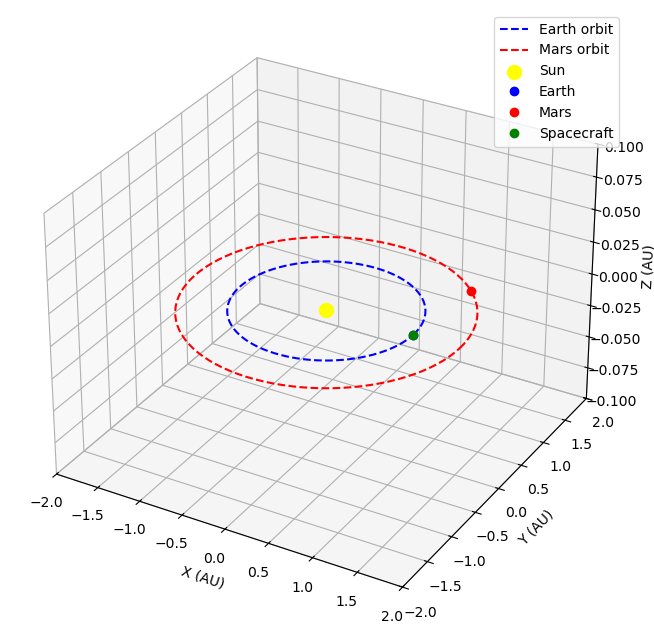

In [2]:
#Grok 3 think
#Generate code for an animated 3d plot of a launch from earth landing on mars and then back to earth at the next launch window
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D

# Define constants (all distances in AU, time in years)
r_earth = 1.0          # Earth's orbital radius
r_mars = 1.524         # Mars' orbital radius
T_earth = 1.0          # Earth's orbital period
T_mars = 1.8808        # Mars' orbital period
omega_earth = 2 * np.pi / T_earth  # Earth's angular velocity
omega_mars = 2 * np.pi / T_mars    # Mars' angular velocity

# Calculate Hohmann transfer orbit parameters
a_transfer = (r_earth + r_mars) / 2  # Semi-major axis of transfer orbit
T_transfer = (a_transfer / r_earth)**1.5 * T_earth  # Period of transfer orbit
t_transfer = T_transfer / 2  # Transfer time (half the orbit)
e = (r_mars - r_earth) / (r_earth + r_mars)  # Eccentricity of transfer orbit

# Initial angular positions
theta0_earth = 0.0
theta0_mars = np.pi - omega_mars * t_transfer  # Ensures correct phase angle for launch

# Calculate return launch time (t_return)
rhs = theta0_mars - np.pi - omega_earth * t_transfer + 2 * np.pi
t_return = rhs / (omega_earth - omega_mars)

# Define time array for animation
t_max = t_return + t_transfer + 0.1  # Extend slightly past return arrival
dt = 0.01  # Time step
frames = int(t_max / dt)
t_array = np.linspace(0, t_max, frames)

# Function to solve Kepler's equation using Newton's method
def solve_kepler(M, e, tol=1e-6):
    """
    Solve Kepler's equation M = E - e * sin(E) for eccentric anomaly E.
    
    Parameters:
    - M: Mean anomaly
    - e: Eccentricity
    - tol: Tolerance for convergence
    
    Returns:
    - E: Eccentric anomaly
    """
    E = M  # Initial guess
    while True:
        f = E - e * np.sin(E) - M
        f_prime = 1 - e * np.cos(E)
        delta = -f / f_prime
        E += delta
        if abs(delta) < tol:
            break
    return E

# Function to get spacecraft position at time t
def get_spacecraft_position(t):
    """
    Calculate spacecraft position at time t.
    
    Parameters:
    - t: Current time
    
    Returns:
    - Tuple (x, y, z) of spacecraft position, or None if not in transit
    """
    if 0 <= t < t_transfer:
        # Earth to Mars transfer
        tau = t
        M = (2 * np.pi / T_transfer) * tau
        E = solve_kepler(M, e)
        x_prime = a_transfer * (np.cos(E) - e)
        y_prime = a_transfer * np.sqrt(1 - e**2) * np.sin(E)
        return (x_prime, y_prime, 0)
    elif t_transfer <= t < t_return:
        # On Mars
        theta_mars = omega_mars * t + theta0_mars
        x_mars = r_mars * np.cos(theta_mars)
        y_mars = r_mars * np.sin(theta_mars)
        return (x_mars, y_mars, 0)
    elif t_return <= t < t_return + t_transfer:
        # Mars to Earth transfer
        tau = t - t_return
        M = np.pi + (2 * np.pi / T_transfer) * tau
        E = solve_kepler(M, e)
        x_prime = a_transfer * (np.cos(E) - e)
        y_prime = a_transfer * np.sqrt(1 - e**2) * np.sin(E)
        phi = omega_mars * t_return + theta0_mars
        x = -x_prime * np.cos(phi) + y_prime * np.sin(phi)
        y = -x_prime * np.sin(phi) - y_prime * np.cos(phi)
        return (x, y, 0)
    else:
        # After arrival back at Earth, don't show spacecraft
        return None

# Set up the figure and 3D axes
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the orbits
theta = np.linspace(0, 2 * np.pi, 100)
ax.plot(r_earth * np.cos(theta), r_earth * np.sin(theta), np.zeros_like(theta),
        'b--', label='Earth orbit')
ax.plot(r_mars * np.cos(theta), r_mars * np.sin(theta), np.zeros_like(theta),
        'r--', label='Mars orbit')

# Plot the Sun
ax.scatter([0], [0], [0], color='yellow', s=100, label='Sun')

# Initialize points for Earth, Mars, and spacecraft
earth_point, = ax.plot([], [], [], 'bo', label='Earth')
mars_point, = ax.plot([], [], [], 'ro', label='Mars')
spacecraft_point, = ax.plot([], [], [], 'go', label='Spacecraft')

# Set plot limits and labels
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_zlim(-0.1, 0.1)
ax.set_xlabel('X (AU)')
ax.set_ylabel('Y (AU)')
ax.set_zlabel('Z (AU)')
ax.legend()

# Animation function
def animate(i):
    """
    Update the positions of Earth, Mars, and spacecraft for frame i.
    
    Parameters:
    - i: Frame index
    
    Returns:
    - Updated plot objects
    """
    t = t_array[i]
    
    # Earth position
    theta_earth = omega_earth * t + theta0_earth
    x_earth = r_earth * np.cos(theta_earth)
    y_earth = r_earth * np.sin(theta_earth)
    earth_point.set_data([x_earth], [y_earth])
    earth_point.set_3d_properties([0])
    
    # Mars position
    theta_mars = omega_mars * t + theta0_mars
    x_mars = r_mars * np.cos(theta_mars)
    y_mars = r_mars * np.sin(theta_mars)
    mars_point.set_data([x_mars], [y_mars])
    mars_point.set_3d_properties([0])
    
    # Spacecraft position
    sc_pos = get_spacecraft_position(t)
    if sc_pos is not None:
        x_sc, y_sc, z_sc = sc_pos
        spacecraft_point.set_data([x_sc], [y_sc])
        spacecraft_point.set_3d_properties([z_sc])
    else:
        spacecraft_point.set_data([], [])
        spacecraft_point.set_3d_properties([])
    
    return earth_point, mars_point, spacecraft_point,

# Create animation
ani = animation.FuncAnimation(fig, animate, frames=frames, interval=20, blit=False)
#plt.show()
# 显示动画
from IPython.display import HTML
HTML(ani.to_html5_video())

ValueError: Argument Z must be 2-dimensional.

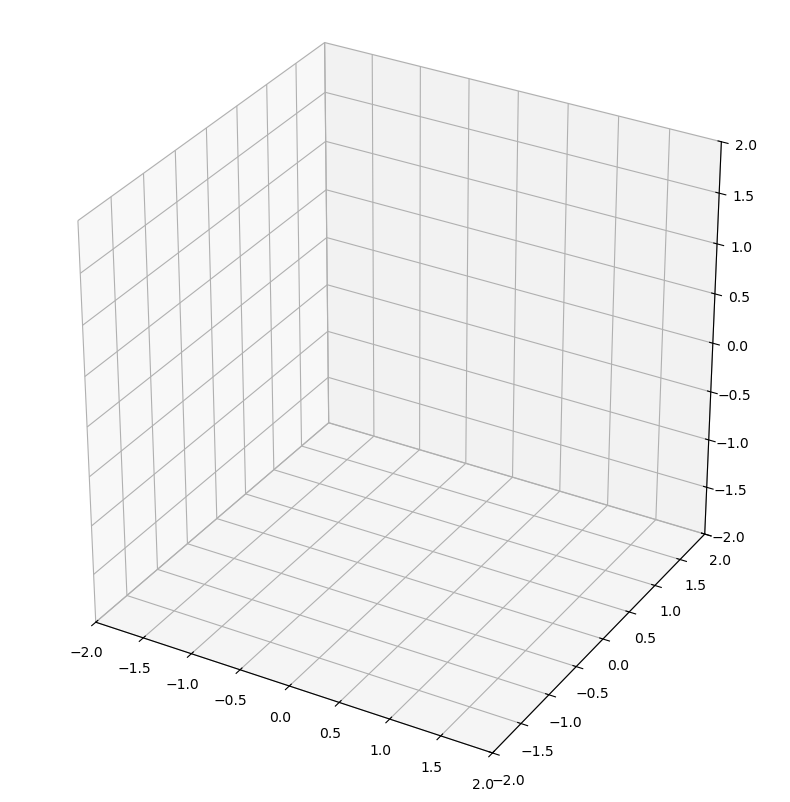

In [3]:
#Deepseek R1 first attempt
#Generate code for an animated 3d plot of a launch from earth landing on mars and then back to earth at the next launch window
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D

# Constants
AU = 1.0  # Astronomical Unit
EARTH_RADIUS = 0.1  # Size for visibility
MARS_RADIUS = 0.08
SUN_RADIUS = 0.2

EARTH_ORBIT_RADIUS = 1.0 * AU
MARS_ORBIT_RADIUS = 1.524 * AU

EARTH_PERIOD = 12  # months
MARS_PERIOD = 24  # Simplified period for Mars

TRANSFER_TIME = 8.5  # Hohmann transfer time (months)
STAY_TIME = 15.5     # Time on Mars (months)
RETURN_TRANSFER_TIME = 8.5
TOTAL_TIME = TRANSFER_TIME + STAY_TIME + RETURN_TRANSFER_TIME  # Total mission time

# Initial angles (Earth at 0°, Mars at phase angle 52.5°)
earth_theta_0 = 0
mars_theta_0 = 52.5  # Phase angle for Hohmann transfer

# Transfer orbit parameters
a = (EARTH_ORBIT_RADIUS + MARS_ORBIT_RADIUS) / 2  # Semi-major axis
e = (MARS_ORBIT_RADIUS - EARTH_ORBIT_RADIUS) / (MARS_ORBIT_RADIUS + EARTH_ORBIT_RADIUS)  # Eccentricity
b = a * np.sqrt(1 - e**2)  # Semi-minor axis

# Solve Kepler's equation: M = E - e*sin(E)
def solve_kepler(M, e, tol=1e-6, max_iter=100):
    E = M  # Initial guess
    for _ in range(max_iter):
        delta = (E - e * np.sin(E) - M) / (1 - e * np.cos(E))
        E -= delta
        if abs(delta) < tol:
            break
    return E

# Set up the 3D plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_zlim(-2, 2)
ax.set_box_aspect([1,1,1])

# Create celestial bodies
sun = ax.plot_surface(*np.ogrid[-SUN_RADIUS:SUN_RADIUS:2j, -SUN_RADIUS:SUN_RADIUS:2j, -SUN_RADIUS:SUN_RADIUS:2j],
                      color='yellow', alpha=0.5)
earth_point, = ax.plot([], [], [], 'o', color='blue', markersize=EARTH_RADIUS*50)
mars_point, = ax.plot([], [], [], 'o', color='red', markersize=MARS_RADIUS*50)
spacecraft_point, = ax.plot([], [], [], 'o', color='black', markersize=5)
trajectory_line, = ax.plot([], [], [], 'g--', lw=1)

# Trajectory history
x_traj, y_traj, z_traj = [], [], []

def init():
    earth_point.set_data([], [])
    earth_point.set_3d_properties([])
    mars_point.set_data([], [])
    mars_point.set_3d_properties([])
    spacecraft_point.set_data([], [])
    spacecraft_point.set_3d_properties([])
    trajectory_line.set_data([], [])
    trajectory_line.set_3d_properties([])
    return earth_point, mars_point, spacecraft_point, trajectory_line

def update(frame):
    t = frame  # Time in months
    
    # Update Earth and Mars positions
    earth_theta = np.radians(earth_theta_0 + (360 / EARTH_PERIOD) * t)
    mars_theta = np.radians(mars_theta_0 + (360 / MARS_PERIOD) * t)
    
    earth_x = EARTH_ORBIT_RADIUS * np.cos(earth_theta)
    earth_y = EARTH_ORBIT_RADIUS * np.sin(earth_theta)
    earth_z = 0
    
    mars_x = MARS_ORBIT_RADIUS * np.cos(mars_theta)
    mars_y = MARS_ORBIT_RADIUS * np.sin(mars_theta)
    mars_z = 0
    
    earth_point.set_data([earth_x], [earth_y])
    earth_point.set_3d_properties([earth_z])
    mars_point.set_data([mars_x], [mars_y])
    mars_point.set_3d_properties([mars_z])
    
    # Update spacecraft position
    if t <= TRANSFER_TIME:
        # Outbound transfer to Mars
        M = (np.pi * t) / TRANSFER_TIME
        E = solve_kepler(M, e)
        x = a * np.cos(E) - a * e
        y = b * np.sin(E)
        z = 0
    elif TRANSFER_TIME < t <= TRANSFER_TIME + STAY_TIME:
        # Stay on Mars
        x, y, z = mars_x, mars_y, mars_z
    else:
        # Return transfer to Earth
        t_prime = t - (TRANSFER_TIME + STAY_TIME)
        M = np.pi + (np.pi * t_prime) / RETURN_TRANSFER_TIME
        E = solve_kepler(M, e)
        x = a * np.cos(E) - a * e
        y = b * np.sin(E)
        z = 0
    
    spacecraft_point.set_data([x], [y])
    spacecraft_point.set_3d_properties([z])
    
    # Update trajectory
    x_traj.append(x)
    y_traj.append(y)
    z_traj.append(z)
    trajectory_line.set_data(x_traj, y_traj)
    trajectory_line.set_3d_properties(z_traj)
    
    return earth_point, mars_point, spacecraft_point, trajectory_line

# Animate the mission
ani = FuncAnimation(fig, update, frames=np.arange(0, TOTAL_TIME, 0.5),
                    init_func=init, blit=True, interval=50)

plt.show()

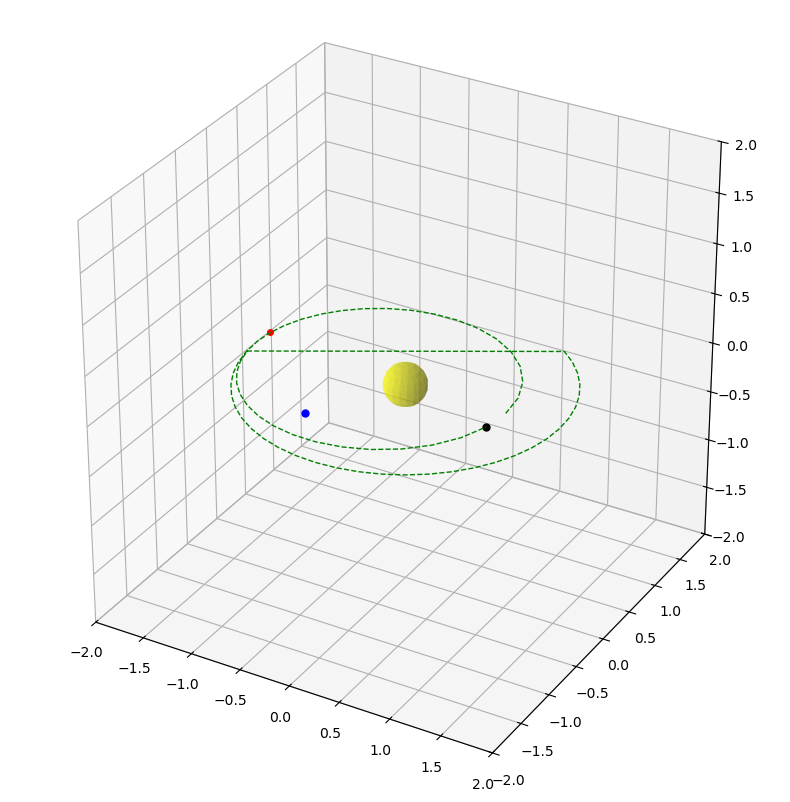

In [5]:
#Deepseek R1 second attempt
#Generate code for an animated 3d plot of a launch from earth landing on mars and then back to earth at the next launch window
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D

# Constants
AU = 1.0  # Astronomical Unit
EARTH_RADIUS = 0.1  # Size for visibility
MARS_RADIUS = 0.08
SUN_RADIUS = 0.2

EARTH_ORBIT_RADIUS = 1.0 * AU
MARS_ORBIT_RADIUS = 1.524 * AU

EARTH_PERIOD = 12  # months
MARS_PERIOD = 24  # Simplified period for Mars

TRANSFER_TIME = 8.5  # Hohmann transfer time (months)
STAY_TIME = 15.5     # Time on Mars (months)
RETURN_TRANSFER_TIME = 8.5
TOTAL_TIME = TRANSFER_TIME + STAY_TIME + RETURN_TRANSFER_TIME  # Total mission time

# Initial angles (Earth at 0°, Mars at phase angle 52.5°)
earth_theta_0 = 0
mars_theta_0 = 52.5  # Phase angle for Hohmann transfer

# Transfer orbit parameters
a = (EARTH_ORBIT_RADIUS + MARS_ORBIT_RADIUS) / 2  # Semi-major axis
e = (MARS_ORBIT_RADIUS - EARTH_ORBIT_RADIUS) / (MARS_ORBIT_RADIUS + EARTH_ORBIT_RADIUS)  # Eccentricity
b = a * np.sqrt(1 - e**2)  # Semi-minor axis

# Solve Kepler's equation: M = E - e*sin(E)
def solve_kepler(M, e, tol=1e-6, max_iter=100):
    E = M  # Initial guess
    for _ in range(max_iter):
        delta = (E - e * np.sin(E) - M) / (1 - e * np.cos(E))
        E -= delta
        if abs(delta) < tol:
            break
    return E

# Set up the 3D plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_zlim(-2, 2)
ax.set_box_aspect([1,1,1])

# Create celestial bodies
u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
x_sun = SUN_RADIUS * np.cos(u) * np.sin(v)
y_sun = SUN_RADIUS * np.sin(u) * np.sin(v)
z_sun = SUN_RADIUS * np.cos(v)
ax.plot_surface(x_sun, y_sun, z_sun, color='yellow', alpha=0.5)

earth_point, = ax.plot([], [], [], 'o', color='blue', markersize=EARTH_RADIUS*50)
mars_point, = ax.plot([], [], [], 'o', color='red', markersize=MARS_RADIUS*50)
spacecraft_point, = ax.plot([], [], [], 'o', color='black', markersize=5)
trajectory_line, = ax.plot([], [], [], 'g--', lw=1)

# Trajectory history
x_traj, y_traj, z_traj = [], [], []

def init():
    earth_point.set_data([], [])
    earth_point.set_3d_properties([])
    mars_point.set_data([], [])
    mars_point.set_3d_properties([])
    spacecraft_point.set_data([], [])
    spacecraft_point.set_3d_properties([])
    trajectory_line.set_data([], [])
    trajectory_line.set_3d_properties([])
    return earth_point, mars_point, spacecraft_point, trajectory_line

def update(frame):
    t = frame  # Time in months
    
    # Update Earth and Mars positions
    earth_theta = np.radians(earth_theta_0 + (360 / EARTH_PERIOD) * t)
    mars_theta = np.radians(mars_theta_0 + (360 / MARS_PERIOD) * t)
    
    earth_x = EARTH_ORBIT_RADIUS * np.cos(earth_theta)
    earth_y = EARTH_ORBIT_RADIUS * np.sin(earth_theta)
    earth_z = 0
    
    mars_x = MARS_ORBIT_RADIUS * np.cos(mars_theta)
    mars_y = MARS_ORBIT_RADIUS * np.sin(mars_theta)
    mars_z = 0
    
    earth_point.set_data([earth_x], [earth_y])
    earth_point.set_3d_properties([earth_z])
    mars_point.set_data([mars_x], [mars_y])
    mars_point.set_3d_properties([mars_z])
    
    # Update spacecraft position
    if t <= TRANSFER_TIME:
        # Outbound transfer to Mars
        M = (np.pi * t) / TRANSFER_TIME
        E = solve_kepler(M, e)
        x = a * np.cos(E) - a * e
        y = b * np.sin(E)
        z = 0
    elif TRANSFER_TIME < t <= TRANSFER_TIME + STAY_TIME:
        # Stay on Mars
        x, y, z = mars_x, mars_y, mars_z
    else:
        # Return transfer to Earth
        t_prime = t - (TRANSFER_TIME + STAY_TIME)
        M = np.pi + (np.pi * t_prime) / RETURN_TRANSFER_TIME
        E = solve_kepler(M, e)
        x = a * np.cos(E) - a * e
        y = b * np.sin(E)
        z = 0
    
    spacecraft_point.set_data([x], [y])
    spacecraft_point.set_3d_properties([z])
    
    # Update trajectory
    x_traj.append(x)
    y_traj.append(y)
    z_traj.append(z)
    trajectory_line.set_data(x_traj, y_traj)
    trajectory_line.set_3d_properties(z_traj)
    
    return earth_point, mars_point, spacecraft_point, trajectory_line

# Animate the mission
ani = FuncAnimation(fig, update, frames=np.arange(0, TOTAL_TIME, 0.5),
                    init_func=init, blit=True, interval=50)

#plt.show()
# 显示动画
from IPython.display import HTML
HTML(ani.to_html5_video())